# 0. Install Dependencies

In [9]:
!pip3 install stable-baselines3 gym-anytrading

In [5]:
!pip3 install tensorflow

In [10]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# 1. Bring in Market Data

In [50]:
df = pd.read_csv('data/ethdata.csv', thousands=',')

In [51]:
df.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [52]:
df['Date'] = pd.to_datetime(df['Date'])

In [53]:
df.head()

,Date,Open,High,Low,Close
0,2021-06-17,2400.17,2457.61,2306.55,2343.23
1,2021-06-16,2523.24,2563.96,2382.43,2402.42
2,2021-06-15,2541.43,2639.23,2512.66,2522.43
3,2021-06-14,2577.09,2608.27,2520.78,2541.84
4,2021-06-13,2403.58,2562.82,2316.34,2562.82


In [54]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close
Date,,,,
2021-06-17,2400.17,2457.61,2306.55,2343.23
2021-06-16,2523.24,2563.96,2382.43,2402.42
2021-06-15,2541.43,2639.23,2512.66,2522.43
2021-06-14,2577.09,2608.27,2520.78,2541.84
2021-06-13,2403.58,2562.82,2316.34,2562.82


In [62]:
df.tail()

,Open,High,Low,Close
Date,,,,
2017-01-05,11.02,11.64,9.10,10.32
2017-01-04,9.63,11.12,9.42,11.02
2017-01-03,8.37,10.10,8.26,9.57
2017-01-02,8.20,8.48,8.10,8.40
2017-01-01,8.10,8.56,8.05,8.20


In [67]:
print(len(df))

1264


In [102]:
df = df[::-1]

In [103]:
df.head()

,Open,High,Low,Close
Date,,,,
2017-01-01,8.10,8.56,8.05,8.20
2017-01-02,8.20,8.48,8.10,8.40
2017-01-03,8.37,10.10,8.26,9.57
2017-01-04,9.63,11.12,9.42,11.02
2017-01-05,11.02,11.64,9.10,10.32


In [104]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,1263), window_size=5)

In [105]:
env.prices

array([   8.2 ,    8.4 ,    9.57, ..., 2541.84, 2522.43, 2402.42])

# 2. Build Environment

info {'total_reward': 1069.1000000000004, 'total_profit': 0.07736027268235024, 'position': 1}


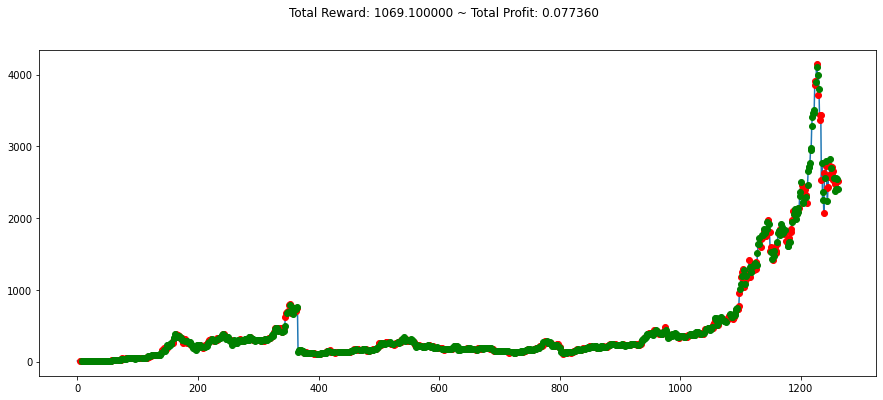

In [106]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

# 3. Train the Model

In [116]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,1263), window_size=5)
env = DummyVecEnv([env_maker])

In [117]:
model = A2C('MlpPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 577      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.631   |
|    explained_variance | -0.00206 |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 8.63     |
|    value_loss         | 162      |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 567       |
|    iterations         | 200       |
|    time_elapsed       | 1         |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy_loss       | -0.513    |
|    explained_variance | -0.000551 |
|    learning_rate      | 0.0007    |
|    n_updates          | 199       |
|    policy_loss        | 3.85      |
|    valu

------------------------------------
| time/                 |          |
|    fps                | 526      |
|    iterations         | 1700     |
|    time_elapsed       | 16       |
|    total_timesteps    | 8500     |
| train/                |          |
|    entropy_loss       | -0.672   |
|    explained_variance | -0.0136  |
|    learning_rate      | 0.0007   |
|    n_updates          | 1699     |
|    policy_loss        | 21.3     |
|    value_loss         | 1.31e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 525      |
|    iterations         | 1800     |
|    time_elapsed       | 17       |
|    total_timesteps    | 9000     |
| train/                |          |
|    entropy_loss       | -0.667   |
|    explained_variance | -0.00348 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1799     |
|    policy_loss        | 38.5     |
|    value_loss         | 4.93e+03 |
-

------------------------------------
| time/                 |          |
|    fps                | 526      |
|    iterations         | 3300     |
|    time_elapsed       | 31       |
|    total_timesteps    | 16500    |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0.00108  |
|    learning_rate      | 0.0007   |
|    n_updates          | 3299     |
|    policy_loss        | 4.36     |
|    value_loss         | 68       |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 529       |
|    iterations         | 3400      |
|    time_elapsed       | 32        |
|    total_timesteps    | 17000     |
| train/                |           |
|    entropy_loss       | -0.657    |
|    explained_variance | -3.58e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3399      |
|    policy_loss        | -0.99     |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 526      |
|    iterations         | 4900     |
|    time_elapsed       | 46       |
|    total_timesteps    | 24500    |
| train/                |          |
|    entropy_loss       | -0.687   |
|    explained_variance | 0.00407  |
|    learning_rate      | 0.0007   |
|    n_updates          | 4899     |
|    policy_loss        | 2.75     |
|    value_loss         | 29.5     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 526      |
|    iterations         | 5000     |
|    time_elapsed       | 47       |
|    total_timesteps    | 25000    |
| train/                |          |
|    entropy_loss       | -0.659   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 4999     |
|    policy_loss        | 51.1     |
|    value_loss         | 1.23e+04 |
-

------------------------------------
| time/                 |          |
|    fps                | 536      |
|    iterations         | 6500     |
|    time_elapsed       | 60       |
|    total_timesteps    | 32500    |
| train/                |          |
|    entropy_loss       | -0.675   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6499     |
|    policy_loss        | -39.6    |
|    value_loss         | 4.19e+03 |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 536       |
|    iterations         | 6600      |
|    time_elapsed       | 61        |
|    total_timesteps    | 33000     |
| train/                |           |
|    entropy_loss       | -0.692    |
|    explained_variance | -0.000145 |
|    learning_rate      | 0.0007    |
|    n_updates          | 6599      |
|    policy_loss        | 2.34      |
|    value_loss         | 

-------------------------------------
| time/                 |           |
|    fps                | 537       |
|    iterations         | 8100      |
|    time_elapsed       | 75        |
|    total_timesteps    | 40500     |
| train/                |           |
|    entropy_loss       | -0.693    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 8099      |
|    policy_loss        | -2.7      |
|    value_loss         | 19.1      |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 537      |
|    iterations         | 8200     |
|    time_elapsed       | 76       |
|    total_timesteps    | 41000    |
| train/                |          |
|    entropy_loss       | -0.679   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 8199     |
|    policy_loss        | -0.0388  |
|    value_loss         

-------------------------------------
| time/                 |           |
|    fps                | 530       |
|    iterations         | 9700      |
|    time_elapsed       | 91        |
|    total_timesteps    | 48500     |
| train/                |           |
|    entropy_loss       | -0.611    |
|    explained_variance | -0.000103 |
|    learning_rate      | 0.0007    |
|    n_updates          | 9699      |
|    policy_loss        | -0.296    |
|    value_loss         | 1.59      |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 530      |
|    iterations         | 9800     |
|    time_elapsed       | 92       |
|    total_timesteps    | 49000    |
| train/                |          |
|    entropy_loss       | -0.676   |
|    explained_variance | 7.51e-06 |
|    learning_rate      | 0.0007   |
|    n_updates          | 9799     |
|    policy_loss        | -877     |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 531      |
|    iterations         | 11300    |
|    time_elapsed       | 106      |
|    total_timesteps    | 56500    |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 11299    |
|    policy_loss        | 13.3     |
|    value_loss         | 745      |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 530       |
|    iterations         | 11400     |
|    time_elapsed       | 107       |
|    total_timesteps    | 57000     |
| train/                |           |
|    entropy_loss       | -0.689    |
|    explained_variance | -5.85e-05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 11399     |
|    policy_loss        | -2.37     |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 532      |
|    iterations         | 12900    |
|    time_elapsed       | 121      |
|    total_timesteps    | 64500    |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 12899    |
|    policy_loss        | -0.822   |
|    value_loss         | 5.52     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 533      |
|    iterations         | 13000    |
|    time_elapsed       | 121      |
|    total_timesteps    | 65000    |
| train/                |          |
|    entropy_loss       | -0.675   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 12999    |
|    policy_loss        | 3.07     |
|    value_loss         | 23.5     |
-

------------------------------------
| time/                 |          |
|    fps                | 537      |
|    iterations         | 14500    |
|    time_elapsed       | 135      |
|    total_timesteps    | 72500    |
| train/                |          |
|    entropy_loss       | -0.668   |
|    explained_variance | 0.000371 |
|    learning_rate      | 0.0007   |
|    n_updates          | 14499    |
|    policy_loss        | 13.4     |
|    value_loss         | 444      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 537      |
|    iterations         | 14600    |
|    time_elapsed       | 135      |
|    total_timesteps    | 73000    |
| train/                |          |
|    entropy_loss       | -0.687   |
|    explained_variance | 0.00374  |
|    learning_rate      | 0.0007   |
|    n_updates          | 14599    |
|    policy_loss        | -0.289   |
|    value_loss         | 1.32     |
-

------------------------------------
| time/                 |          |
|    fps                | 544      |
|    iterations         | 16100    |
|    time_elapsed       | 147      |
|    total_timesteps    | 80500    |
| train/                |          |
|    entropy_loss       | -0.691   |
|    explained_variance | -1.11    |
|    learning_rate      | 0.0007   |
|    n_updates          | 16099    |
|    policy_loss        | -0.0306  |
|    value_loss         | 0.00276  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 545      |
|    iterations         | 16200    |
|    time_elapsed       | 148      |
|    total_timesteps    | 81000    |
| train/                |          |
|    entropy_loss       | -0.691   |
|    explained_variance | 0.0359   |
|    learning_rate      | 0.0007   |
|    n_updates          | 16199    |
|    policy_loss        | 3.72     |
|    value_loss         | 31.3     |
-

------------------------------------
| time/                 |          |
|    fps                | 550      |
|    iterations         | 17700    |
|    time_elapsed       | 160      |
|    total_timesteps    | 88500    |
| train/                |          |
|    entropy_loss       | -0.684   |
|    explained_variance | 0.0114   |
|    learning_rate      | 0.0007   |
|    n_updates          | 17699    |
|    policy_loss        | 3.08     |
|    value_loss         | 34       |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 550      |
|    iterations         | 17800    |
|    time_elapsed       | 161      |
|    total_timesteps    | 89000    |
| train/                |          |
|    entropy_loss       | -0.688   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 17799    |
|    policy_loss        | -6.31    |
|    value_loss         | 80.2     |
-

------------------------------------
| time/                 |          |
|    fps                | 556      |
|    iterations         | 19300    |
|    time_elapsed       | 173      |
|    total_timesteps    | 96500    |
| train/                |          |
|    entropy_loss       | -0.68    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 19299    |
|    policy_loss        | -0.0391  |
|    value_loss         | 0.00629  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 556      |
|    iterations         | 19400    |
|    time_elapsed       | 174      |
|    total_timesteps    | 97000    |
| train/                |          |
|    entropy_loss       | -0.676   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 19399    |
|    policy_loss        | -0.0377  |
|    value_loss         | 0.00632  |
-

------------------------------------
| time/                 |          |
|    fps                | 562      |
|    iterations         | 20900    |
|    time_elapsed       | 185      |
|    total_timesteps    | 104500   |
| train/                |          |
|    entropy_loss       | -0.688   |
|    explained_variance | 0.000238 |
|    learning_rate      | 0.0007   |
|    n_updates          | 20899    |
|    policy_loss        | 5.6      |
|    value_loss         | 128      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 562      |
|    iterations         | 21000    |
|    time_elapsed       | 186      |
|    total_timesteps    | 105000   |
| train/                |          |
|    entropy_loss       | -0.69    |
|    explained_variance | -0.00695 |
|    learning_rate      | 0.0007   |
|    n_updates          | 20999    |
|    policy_loss        | 4.41     |
|    value_loss         | 68.6     |
-

------------------------------------
| time/                 |          |
|    fps                | 564      |
|    iterations         | 22500    |
|    time_elapsed       | 199      |
|    total_timesteps    | 112500   |
| train/                |          |
|    entropy_loss       | -0.671   |
|    explained_variance | -0.00366 |
|    learning_rate      | 0.0007   |
|    n_updates          | 22499    |
|    policy_loss        | 2.77     |
|    value_loss         | 38.1     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 564      |
|    iterations         | 22600    |
|    time_elapsed       | 200      |
|    total_timesteps    | 113000   |
| train/                |          |
|    entropy_loss       | -0.609   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 22599    |
|    policy_loss        | -35      |
|    value_loss         | 4.77e+03 |
-

------------------------------------
| time/                 |          |
|    fps                | 569      |
|    iterations         | 24100    |
|    time_elapsed       | 211      |
|    total_timesteps    | 120500   |
| train/                |          |
|    entropy_loss       | -0.638   |
|    explained_variance | -6.96    |
|    learning_rate      | 0.0007   |
|    n_updates          | 24099    |
|    policy_loss        | -0.017   |
|    value_loss         | 0.00183  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 569      |
|    iterations         | 24200    |
|    time_elapsed       | 212      |
|    total_timesteps    | 121000   |
| train/                |          |
|    entropy_loss       | -0.687   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 24199    |
|    policy_loss        | -4.68    |
|    value_loss         | 61       |
-

------------------------------------
| time/                 |          |
|    fps                | 561      |
|    iterations         | 25700    |
|    time_elapsed       | 228      |
|    total_timesteps    | 128500   |
| train/                |          |
|    entropy_loss       | -0.685   |
|    explained_variance | 4.95e-05 |
|    learning_rate      | 0.0007   |
|    n_updates          | 25699    |
|    policy_loss        | 0.199    |
|    value_loss         | 0.286    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 561      |
|    iterations         | 25800    |
|    time_elapsed       | 229      |
|    total_timesteps    | 129000   |
| train/                |          |
|    entropy_loss       | -0.69    |
|    explained_variance | -0.00403 |
|    learning_rate      | 0.0007   |
|    n_updates          | 25799    |
|    policy_loss        | 0.408    |
|    value_loss         | 2.29     |
-

-------------------------------------
| time/                 |           |
|    fps                | 563       |
|    iterations         | 27300     |
|    time_elapsed       | 242       |
|    total_timesteps    | 136500    |
| train/                |           |
|    entropy_loss       | -0.673    |
|    explained_variance | -5.96e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 27299     |
|    policy_loss        | 1.4       |
|    value_loss         | 9.71      |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 564       |
|    iterations         | 27400     |
|    time_elapsed       | 242       |
|    total_timesteps    | 137000    |
| train/                |           |
|    entropy_loss       | -0.691    |
|    explained_variance | -7.07e-05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 27399     |
|    policy_loss        | 68.1      |
|    value_l

------------------------------------
| time/                 |          |
|    fps                | 568      |
|    iterations         | 28900    |
|    time_elapsed       | 254      |
|    total_timesteps    | 144500   |
| train/                |          |
|    entropy_loss       | -0.633   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 28899    |
|    policy_loss        | 49.1     |
|    value_loss         | 9.92e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 568      |
|    iterations         | 29000    |
|    time_elapsed       | 255      |
|    total_timesteps    | 145000   |
| train/                |          |
|    entropy_loss       | -0.689   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 28999    |
|    policy_loss        | -3.31    |
|    value_loss         | 19.5     |
-

------------------------------------
| time/                 |          |
|    fps                | 571      |
|    iterations         | 30500    |
|    time_elapsed       | 266      |
|    total_timesteps    | 152500   |
| train/                |          |
|    entropy_loss       | -0.679   |
|    explained_variance | 2.91e-05 |
|    learning_rate      | 0.0007   |
|    n_updates          | 30499    |
|    policy_loss        | -0.976   |
|    value_loss         | 3.04     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 571      |
|    iterations         | 30600    |
|    time_elapsed       | 267      |
|    total_timesteps    | 153000   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 30599    |
|    policy_loss        | -0.0513  |
|    value_loss         | 0.0066   |
-

------------------------------------
| time/                 |          |
|    fps                | 574      |
|    iterations         | 32100    |
|    time_elapsed       | 279      |
|    total_timesteps    | 160500   |
| train/                |          |
|    entropy_loss       | -0.69    |
|    explained_variance | -0.00148 |
|    learning_rate      | 0.0007   |
|    n_updates          | 32099    |
|    policy_loss        | 1.64     |
|    value_loss         | 14.1     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 574      |
|    iterations         | 32200    |
|    time_elapsed       | 280      |
|    total_timesteps    | 161000   |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 0.00198  |
|    learning_rate      | 0.0007   |
|    n_updates          | 32199    |
|    policy_loss        | 1.89     |
|    value_loss         | 7.11     |
-

------------------------------------
| time/                 |          |
|    fps                | 574      |
|    iterations         | 33700    |
|    time_elapsed       | 293      |
|    total_timesteps    | 168500   |
| train/                |          |
|    entropy_loss       | -0.603   |
|    explained_variance | -0.175   |
|    learning_rate      | 0.0007   |
|    n_updates          | 33699    |
|    policy_loss        | 0.0341   |
|    value_loss         | 0.00469  |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 574       |
|    iterations         | 33800     |
|    time_elapsed       | 294       |
|    total_timesteps    | 169000    |
| train/                |           |
|    entropy_loss       | -0.672    |
|    explained_variance | -0.000269 |
|    learning_rate      | 0.0007    |
|    n_updates          | 33799     |
|    policy_loss        | -11.5     |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 576      |
|    iterations         | 35300    |
|    time_elapsed       | 306      |
|    total_timesteps    | 176500   |
| train/                |          |
|    entropy_loss       | -0.686   |
|    explained_variance | 0.0291   |
|    learning_rate      | 0.0007   |
|    n_updates          | 35299    |
|    policy_loss        | -0.183   |
|    value_loss         | 0.0988   |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 576      |
|    iterations         | 35400    |
|    time_elapsed       | 306      |
|    total_timesteps    | 177000   |
| train/                |          |
|    entropy_loss       | -0.689   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 35399    |
|    policy_loss        | -9.21    |
|    value_loss         | 179      |
-

------------------------------------
| time/                 |          |
|    fps                | 579      |
|    iterations         | 36900    |
|    time_elapsed       | 318      |
|    total_timesteps    | 184500   |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | -0.00254 |
|    learning_rate      | 0.0007   |
|    n_updates          | 36899    |
|    policy_loss        | 1.76     |
|    value_loss         | 10.7     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 579      |
|    iterations         | 37000    |
|    time_elapsed       | 319      |
|    total_timesteps    | 185000   |
| train/                |          |
|    entropy_loss       | -0.69    |
|    explained_variance | 0.0881   |
|    learning_rate      | 0.0007   |
|    n_updates          | 36999    |
|    policy_loss        | -0.0205  |
|    value_loss         | 0.00118  |
-

------------------------------------
| time/                 |          |
|    fps                | 570      |
|    iterations         | 38500    |
|    time_elapsed       | 337      |
|    total_timesteps    | 192500   |
| train/                |          |
|    entropy_loss       | -0.688   |
|    explained_variance | -0.00021 |
|    learning_rate      | 0.0007   |
|    n_updates          | 38499    |
|    policy_loss        | 11       |
|    value_loss         | 499      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 570      |
|    iterations         | 38600    |
|    time_elapsed       | 338      |
|    total_timesteps    | 193000   |
| train/                |          |
|    entropy_loss       | -0.607   |
|    explained_variance | -0.0913  |
|    learning_rate      | 0.0007   |
|    n_updates          | 38599    |
|    policy_loss        | -0.0198  |
|    value_loss         | 0.0029   |
-

------------------------------------
| time/                 |          |
|    fps                | 572      |
|    iterations         | 40100    |
|    time_elapsed       | 350      |
|    total_timesteps    | 200500   |
| train/                |          |
|    entropy_loss       | -0.666   |
|    explained_variance | 0.0589   |
|    learning_rate      | 0.0007   |
|    n_updates          | 40099    |
|    policy_loss        | -1.63    |
|    value_loss         | 5.54     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 572      |
|    iterations         | 40200    |
|    time_elapsed       | 350      |
|    total_timesteps    | 201000   |
| train/                |          |
|    entropy_loss       | -0.682   |
|    explained_variance | 0.000578 |
|    learning_rate      | 0.0007   |
|    n_updates          | 40199    |
|    policy_loss        | 4.95     |
|    value_loss         | 2.09e+03 |
-

-------------------------------------
| time/                 |           |
|    fps                | 571       |
|    iterations         | 41700     |
|    time_elapsed       | 364       |
|    total_timesteps    | 208500    |
| train/                |           |
|    entropy_loss       | -0.681    |
|    explained_variance | -0.000193 |
|    learning_rate      | 0.0007    |
|    n_updates          | 41699     |
|    policy_loss        | 0.0322    |
|    value_loss         | 796       |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 571      |
|    iterations         | 41800    |
|    time_elapsed       | 365      |
|    total_timesteps    | 209000   |
| train/                |          |
|    entropy_loss       | -0.691   |
|    explained_variance | 0.000159 |
|    learning_rate      | 0.0007   |
|    n_updates          | 41799    |
|    policy_loss        | -9.12    |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 571      |
|    iterations         | 43300    |
|    time_elapsed       | 379      |
|    total_timesteps    | 216500   |
| train/                |          |
|    entropy_loss       | -0.59    |
|    explained_variance | 0.000538 |
|    learning_rate      | 0.0007   |
|    n_updates          | 43299    |
|    policy_loss        | -6.8     |
|    value_loss         | 89.2     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 570      |
|    iterations         | 43400    |
|    time_elapsed       | 380      |
|    total_timesteps    | 217000   |
| train/                |          |
|    entropy_loss       | -0.68    |
|    explained_variance | 0.00199  |
|    learning_rate      | 0.0007   |
|    n_updates          | 43399    |
|    policy_loss        | -4.47    |
|    value_loss         | 57.5     |
-

------------------------------------
| time/                 |          |
|    fps                | 569      |
|    iterations         | 44900    |
|    time_elapsed       | 394      |
|    total_timesteps    | 224500   |
| train/                |          |
|    entropy_loss       | -0.689   |
|    explained_variance | 0.0331   |
|    learning_rate      | 0.0007   |
|    n_updates          | 44899    |
|    policy_loss        | 0.119    |
|    value_loss         | 0.3      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 568      |
|    iterations         | 45000    |
|    time_elapsed       | 395      |
|    total_timesteps    | 225000   |
| train/                |          |
|    entropy_loss       | -0.687   |
|    explained_variance | -0.00028 |
|    learning_rate      | 0.0007   |
|    n_updates          | 44999    |
|    policy_loss        | -20.8    |
|    value_loss         | 2.22e+03 |
-

------------------------------------
| time/                 |          |
|    fps                | 567      |
|    iterations         | 46500    |
|    time_elapsed       | 409      |
|    total_timesteps    | 232500   |
| train/                |          |
|    entropy_loss       | -0.686   |
|    explained_variance | 8.23e-05 |
|    learning_rate      | 0.0007   |
|    n_updates          | 46499    |
|    policy_loss        | 125      |
|    value_loss         | 4.78e+04 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 567      |
|    iterations         | 46600    |
|    time_elapsed       | 410      |
|    total_timesteps    | 233000   |
| train/                |          |
|    entropy_loss       | -0.673   |
|    explained_variance | -0.0611  |
|    learning_rate      | 0.0007   |
|    n_updates          | 46599    |
|    policy_loss        | 0.399    |
|    value_loss         | 0.531    |
-

------------------------------------
| time/                 |          |
|    fps                | 567      |
|    iterations         | 48100    |
|    time_elapsed       | 423      |
|    total_timesteps    | 240500   |
| train/                |          |
|    entropy_loss       | -0.688   |
|    explained_variance | -8.03    |
|    learning_rate      | 0.0007   |
|    n_updates          | 48099    |
|    policy_loss        | -0.0276  |
|    value_loss         | 0.00379  |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 567       |
|    iterations         | 48200     |
|    time_elapsed       | 424       |
|    total_timesteps    | 241000    |
| train/                |           |
|    entropy_loss       | -0.653    |
|    explained_variance | -0.000186 |
|    learning_rate      | 0.0007    |
|    n_updates          | 48199     |
|    policy_loss        | 7.32      |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 564      |
|    iterations         | 49700    |
|    time_elapsed       | 440      |
|    total_timesteps    | 248500   |
| train/                |          |
|    entropy_loss       | -0.681   |
|    explained_variance | -0.00988 |
|    learning_rate      | 0.0007   |
|    n_updates          | 49699    |
|    policy_loss        | 2.16     |
|    value_loss         | 11.7     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 564      |
|    iterations         | 49800    |
|    time_elapsed       | 441      |
|    total_timesteps    | 249000   |
| train/                |          |
|    entropy_loss       | -0.683   |
|    explained_variance | 0.00965  |
|    learning_rate      | 0.0007   |
|    n_updates          | 49799    |
|    policy_loss        | 0.101    |
|    value_loss         | 0.04     |
-

------------------------------------
| time/                 |          |
|    fps                | 564      |
|    iterations         | 51300    |
|    time_elapsed       | 454      |
|    total_timesteps    | 256500   |
| train/                |          |
|    entropy_loss       | -0.666   |
|    explained_variance | -0.00153 |
|    learning_rate      | 0.0007   |
|    n_updates          | 51299    |
|    policy_loss        | 4.17     |
|    value_loss         | 61.5     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 564      |
|    iterations         | 51400    |
|    time_elapsed       | 455      |
|    total_timesteps    | 257000   |
| train/                |          |
|    entropy_loss       | -0.615   |
|    explained_variance | -0.00173 |
|    learning_rate      | 0.0007   |
|    n_updates          | 51399    |
|    policy_loss        | -0.928   |
|    value_loss         | 3.6      |
-

------------------------------------
| time/                 |          |
|    fps                | 565      |
|    iterations         | 52900    |
|    time_elapsed       | 467      |
|    total_timesteps    | 264500   |
| train/                |          |
|    entropy_loss       | -0.687   |
|    explained_variance | 0.000814 |
|    learning_rate      | 0.0007   |
|    n_updates          | 52899    |
|    policy_loss        | 1.69     |
|    value_loss         | 9.28     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 565      |
|    iterations         | 53000    |
|    time_elapsed       | 468      |
|    total_timesteps    | 265000   |
| train/                |          |
|    entropy_loss       | -0.675   |
|    explained_variance | -0.0235  |
|    learning_rate      | 0.0007   |
|    n_updates          | 52999    |
|    policy_loss        | -13.7    |
|    value_loss         | 353      |
-

------------------------------------
| time/                 |          |
|    fps                | 567      |
|    iterations         | 54500    |
|    time_elapsed       | 480      |
|    total_timesteps    | 272500   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | -0.00986 |
|    learning_rate      | 0.0007   |
|    n_updates          | 54499    |
|    policy_loss        | 0.794    |
|    value_loss         | 3.47     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 567      |
|    iterations         | 54600    |
|    time_elapsed       | 481      |
|    total_timesteps    | 273000   |
| train/                |          |
|    entropy_loss       | -0.685   |
|    explained_variance | 0.0386   |
|    learning_rate      | 0.0007   |
|    n_updates          | 54599    |
|    policy_loss        | 0.465    |
|    value_loss         | 1.01     |
-

------------------------------------
| time/                 |          |
|    fps                | 569      |
|    iterations         | 56100    |
|    time_elapsed       | 492      |
|    total_timesteps    | 280500   |
| train/                |          |
|    entropy_loss       | -0.689   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 56099    |
|    policy_loss        | -23.7    |
|    value_loss         | 988      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 569      |
|    iterations         | 56200    |
|    time_elapsed       | 493      |
|    total_timesteps    | 281000   |
| train/                |          |
|    entropy_loss       | -0.69    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 56199    |
|    policy_loss        | -0.568   |
|    value_loss         | 0.983    |
-

------------------------------------
| time/                 |          |
|    fps                | 569      |
|    iterations         | 57700    |
|    time_elapsed       | 506      |
|    total_timesteps    | 288500   |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 57699    |
|    policy_loss        | 8        |
|    value_loss         | 142      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 569      |
|    iterations         | 57800    |
|    time_elapsed       | 507      |
|    total_timesteps    | 289000   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 57799    |
|    policy_loss        | -12      |
|    value_loss         | 2.21e+03 |
-

------------------------------------
| time/                 |          |
|    fps                | 571      |
|    iterations         | 59300    |
|    time_elapsed       | 519      |
|    total_timesteps    | 296500   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 6e-05    |
|    learning_rate      | 0.0007   |
|    n_updates          | 59299    |
|    policy_loss        | 18.7     |
|    value_loss         | 1.82e+03 |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 571       |
|    iterations         | 59400     |
|    time_elapsed       | 519       |
|    total_timesteps    | 297000    |
| train/                |           |
|    entropy_loss       | -0.693    |
|    explained_variance | -5.08e-05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 59399     |
|    policy_loss        | 48        |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 571      |
|    iterations         | 60900    |
|    time_elapsed       | 533      |
|    total_timesteps    | 304500   |
| train/                |          |
|    entropy_loss       | -0.605   |
|    explained_variance | 0.000481 |
|    learning_rate      | 0.0007   |
|    n_updates          | 60899    |
|    policy_loss        | -0.669   |
|    value_loss         | 1.78     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 571      |
|    iterations         | 61000    |
|    time_elapsed       | 533      |
|    total_timesteps    | 305000   |
| train/                |          |
|    entropy_loss       | -0.463   |
|    explained_variance | 0.00411  |
|    learning_rate      | 0.0007   |
|    n_updates          | 60999    |
|    policy_loss        | -5.31    |
|    value_loss         | 114      |
-

------------------------------------
| time/                 |          |
|    fps                | 572      |
|    iterations         | 62500    |
|    time_elapsed       | 545      |
|    total_timesteps    | 312500   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 62499    |
|    policy_loss        | 6.48     |
|    value_loss         | 114      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 572      |
|    iterations         | 62600    |
|    time_elapsed       | 546      |
|    total_timesteps    | 313000   |
| train/                |          |
|    entropy_loss       | -0.681   |
|    explained_variance | 0.000102 |
|    learning_rate      | 0.0007   |
|    n_updates          | 62599    |
|    policy_loss        | 16.8     |
|    value_loss         | 4.9e+03  |
-

-------------------------------------
| time/                 |           |
|    fps                | 574       |
|    iterations         | 64100     |
|    time_elapsed       | 558       |
|    total_timesteps    | 320500    |
| train/                |           |
|    entropy_loss       | -0.693    |
|    explained_variance | -9.54e-06 |
|    learning_rate      | 0.0007    |
|    n_updates          | 64099     |
|    policy_loss        | 216       |
|    value_loss         | 1.58e+05  |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 574      |
|    iterations         | 64200    |
|    time_elapsed       | 558      |
|    total_timesteps    | 321000   |
| train/                |          |
|    entropy_loss       | -0.669   |
|    explained_variance | -2.22    |
|    learning_rate      | 0.0007   |
|    n_updates          | 64199    |
|    policy_loss        | -0.929   |
|    value_loss         

-------------------------------------
| time/                 |           |
|    fps                | 575       |
|    iterations         | 65700     |
|    time_elapsed       | 570       |
|    total_timesteps    | 328500    |
| train/                |           |
|    entropy_loss       | -0.687    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 65699     |
|    policy_loss        | -5.4      |
|    value_loss         | 136       |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 575      |
|    iterations         | 65800    |
|    time_elapsed       | 571      |
|    total_timesteps    | 329000   |
| train/                |          |
|    entropy_loss       | -0.656   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 65799    |
|    policy_loss        | -5.82    |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 577      |
|    iterations         | 67300    |
|    time_elapsed       | 582      |
|    total_timesteps    | 336500   |
| train/                |          |
|    entropy_loss       | -0.688   |
|    explained_variance | 2.62e-06 |
|    learning_rate      | 0.0007   |
|    n_updates          | 67299    |
|    policy_loss        | 3.18     |
|    value_loss         | 32.3     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 577      |
|    iterations         | 67400    |
|    time_elapsed       | 583      |
|    total_timesteps    | 337000   |
| train/                |          |
|    entropy_loss       | -0.683   |
|    explained_variance | 4.28e-05 |
|    learning_rate      | 0.0007   |
|    n_updates          | 67399    |
|    policy_loss        | -1.53    |
|    value_loss         | 8.43     |
-

-------------------------------------
| time/                 |           |
|    fps                | 578       |
|    iterations         | 68900     |
|    time_elapsed       | 595       |
|    total_timesteps    | 344500    |
| train/                |           |
|    entropy_loss       | -0.693    |
|    explained_variance | -0.000685 |
|    learning_rate      | 0.0007    |
|    n_updates          | 68899     |
|    policy_loss        | 0.128     |
|    value_loss         | 0.107     |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 578       |
|    iterations         | 69000     |
|    time_elapsed       | 595       |
|    total_timesteps    | 345000    |
| train/                |           |
|    entropy_loss       | -0.692    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 68999     |
|    policy_loss        | 6.57      |
|    value_l

------------------------------------
| time/                 |          |
|    fps                | 580      |
|    iterations         | 70500    |
|    time_elapsed       | 607      |
|    total_timesteps    | 352500   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 70499    |
|    policy_loss        | 5.33     |
|    value_loss         | 77       |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 580      |
|    iterations         | 70600    |
|    time_elapsed       | 608      |
|    total_timesteps    | 353000   |
| train/                |          |
|    entropy_loss       | -0.679   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 70599    |
|    policy_loss        | 6.45     |
|    value_loss         | 134      |
-

------------------------------------
| time/                 |          |
|    fps                | 581      |
|    iterations         | 72100    |
|    time_elapsed       | 619      |
|    total_timesteps    | 360500   |
| train/                |          |
|    entropy_loss       | -0.683   |
|    explained_variance | -0.0013  |
|    learning_rate      | 0.0007   |
|    n_updates          | 72099    |
|    policy_loss        | -13.3    |
|    value_loss         | 613      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 581      |
|    iterations         | 72200    |
|    time_elapsed       | 620      |
|    total_timesteps    | 361000   |
| train/                |          |
|    entropy_loss       | -0.69    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 72199    |
|    policy_loss        | 13.3     |
|    value_loss         | 459      |
-

------------------------------------
| time/                 |          |
|    fps                | 582      |
|    iterations         | 73700    |
|    time_elapsed       | 632      |
|    total_timesteps    | 368500   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 2.34e-05 |
|    learning_rate      | 0.0007   |
|    n_updates          | 73699    |
|    policy_loss        | -7.53    |
|    value_loss         | 594      |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 582       |
|    iterations         | 73800     |
|    time_elapsed       | 633       |
|    total_timesteps    | 369000    |
| train/                |           |
|    entropy_loss       | -0.693    |
|    explained_variance | -1.07e-06 |
|    learning_rate      | 0.0007    |
|    n_updates          | 73799     |
|    policy_loss        | 0.137     |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 584      |
|    iterations         | 75300    |
|    time_elapsed       | 644      |
|    total_timesteps    | 376500   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 75299    |
|    policy_loss        | -3.52    |
|    value_loss         | 35.5     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 584      |
|    iterations         | 75400    |
|    time_elapsed       | 645      |
|    total_timesteps    | 377000   |
| train/                |          |
|    entropy_loss       | -0.688   |
|    explained_variance | 3.58e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 75399    |
|    policy_loss        | 51.7     |
|    value_loss         | 1.01e+04 |
-

-------------------------------------
| time/                 |           |
|    fps                | 585       |
|    iterations         | 76900     |
|    time_elapsed       | 657       |
|    total_timesteps    | 384500    |
| train/                |           |
|    entropy_loss       | -0.651    |
|    explained_variance | -0.000807 |
|    learning_rate      | 0.0007    |
|    n_updates          | 76899     |
|    policy_loss        | -13.3     |
|    value_loss         | 419       |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 585      |
|    iterations         | 77000    |
|    time_elapsed       | 657      |
|    total_timesteps    | 385000   |
| train/                |          |
|    entropy_loss       | -0.686   |
|    explained_variance | -0.00148 |
|    learning_rate      | 0.0007   |
|    n_updates          | 76999    |
|    policy_loss        | -4.71    |
|    value_loss         

-------------------------------------
| time/                 |           |
|    fps                | 586       |
|    iterations         | 78500     |
|    time_elapsed       | 669       |
|    total_timesteps    | 392500    |
| train/                |           |
|    entropy_loss       | -0.675    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 78499     |
|    policy_loss        | -2.96     |
|    value_loss         | 44.7      |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 586      |
|    iterations         | 78600    |
|    time_elapsed       | 670      |
|    total_timesteps    | 393000   |
| train/                |          |
|    entropy_loss       | -0.643   |
|    explained_variance | 0.00225  |
|    learning_rate      | 0.0007   |
|    n_updates          | 78599    |
|    policy_loss        | 3.25     |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 587      |
|    iterations         | 80100    |
|    time_elapsed       | 681      |
|    total_timesteps    | 400500   |
| train/                |          |
|    entropy_loss       | -0.687   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 80099    |
|    policy_loss        | 7.53     |
|    value_loss         | 458      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 587      |
|    iterations         | 80200    |
|    time_elapsed       | 682      |
|    total_timesteps    | 401000   |
| train/                |          |
|    entropy_loss       | -0.686   |
|    explained_variance | -0.00145 |
|    learning_rate      | 0.0007   |
|    n_updates          | 80199    |
|    policy_loss        | 0.0102   |
|    value_loss         | 0.00507  |
-

-------------------------------------
| time/                 |           |
|    fps                | 588       |
|    iterations         | 81700     |
|    time_elapsed       | 694       |
|    total_timesteps    | 408500    |
| train/                |           |
|    entropy_loss       | -0.693    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 81699     |
|    policy_loss        | -26.4     |
|    value_loss         | 1.06e+04  |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 588      |
|    iterations         | 81800    |
|    time_elapsed       | 695      |
|    total_timesteps    | 409000   |
| train/                |          |
|    entropy_loss       | -0.672   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 81799    |
|    policy_loss        | 4.23     |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 589      |
|    iterations         | 83300    |
|    time_elapsed       | 706      |
|    total_timesteps    | 416500   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 83299    |
|    policy_loss        | 1.02     |
|    value_loss         | 5.5      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 589      |
|    iterations         | 83400    |
|    time_elapsed       | 707      |
|    total_timesteps    | 417000   |
| train/                |          |
|    entropy_loss       | -0.691   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 83399    |
|    policy_loss        | -0.0331  |
|    value_loss         | 0.00333  |
-

------------------------------------
| time/                 |          |
|    fps                | 590      |
|    iterations         | 84900    |
|    time_elapsed       | 719      |
|    total_timesteps    | 424500   |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 84899    |
|    policy_loss        | 0.288    |
|    value_loss         | 0.475    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 590      |
|    iterations         | 85000    |
|    time_elapsed       | 719      |
|    total_timesteps    | 425000   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 84999    |
|    policy_loss        | -0.923   |
|    value_loss         | 4.28     |
-

-------------------------------------
| time/                 |           |
|    fps                | 591       |
|    iterations         | 86500     |
|    time_elapsed       | 731       |
|    total_timesteps    | 432500    |
| train/                |           |
|    entropy_loss       | -0.67     |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 86499     |
|    policy_loss        | -1.15     |
|    value_loss         | 2.45      |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 591      |
|    iterations         | 86600    |
|    time_elapsed       | 732      |
|    total_timesteps    | 433000   |
| train/                |          |
|    entropy_loss       | -0.691   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 86599    |
|    policy_loss        | 0.726    |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 591      |
|    iterations         | 88100    |
|    time_elapsed       | 744      |
|    total_timesteps    | 440500   |
| train/                |          |
|    entropy_loss       | -0.658   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 88099    |
|    policy_loss        | -7.73    |
|    value_loss         | 223      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 591      |
|    iterations         | 88200    |
|    time_elapsed       | 745      |
|    total_timesteps    | 441000   |
| train/                |          |
|    entropy_loss       | -0.68    |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 88199    |
|    policy_loss        | -17.8    |
|    value_loss         | 651      |
-

------------------------------------
| time/                 |          |
|    fps                | 592      |
|    iterations         | 89700    |
|    time_elapsed       | 757      |
|    total_timesteps    | 448500   |
| train/                |          |
|    entropy_loss       | -0.689   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 89699    |
|    policy_loss        | -0.895   |
|    value_loss         | 4.01     |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 592       |
|    iterations         | 89800     |
|    time_elapsed       | 757       |
|    total_timesteps    | 449000    |
| train/                |           |
|    entropy_loss       | -0.657    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 89799     |
|    policy_loss        | 5.45      |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 593      |
|    iterations         | 91300    |
|    time_elapsed       | 769      |
|    total_timesteps    | 456500   |
| train/                |          |
|    entropy_loss       | -0.684   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 91299    |
|    policy_loss        | -0.0538  |
|    value_loss         | 0.00817  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 593      |
|    iterations         | 91400    |
|    time_elapsed       | 770      |
|    total_timesteps    | 457000   |
| train/                |          |
|    entropy_loss       | -0.684   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 91399    |
|    policy_loss        | 0.0364   |
|    value_loss         | 0.0313   |
-

------------------------------------
| time/                 |          |
|    fps                | 593      |
|    iterations         | 92900    |
|    time_elapsed       | 782      |
|    total_timesteps    | 464500   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 92899    |
|    policy_loss        | 10.6     |
|    value_loss         | 383      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 593      |
|    iterations         | 93000    |
|    time_elapsed       | 783      |
|    total_timesteps    | 465000   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0.00127  |
|    learning_rate      | 0.0007   |
|    n_updates          | 92999    |
|    policy_loss        | 20.7     |
|    value_loss         | 1.44e+03 |
-

------------------------------------
| time/                 |          |
|    fps                | 594      |
|    iterations         | 94500    |
|    time_elapsed       | 794      |
|    total_timesteps    | 472500   |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 94499    |
|    policy_loss        | 31.8     |
|    value_loss         | 3.31e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 594      |
|    iterations         | 94600    |
|    time_elapsed       | 795      |
|    total_timesteps    | 473000   |
| train/                |          |
|    entropy_loss       | -0.683   |
|    explained_variance | 0.0582   |
|    learning_rate      | 0.0007   |
|    n_updates          | 94599    |
|    policy_loss        | 0.00474  |
|    value_loss         | 0.000891 |
-

------------------------------------
| time/                 |          |
|    fps                | 595      |
|    iterations         | 96100    |
|    time_elapsed       | 807      |
|    total_timesteps    | 480500   |
| train/                |          |
|    entropy_loss       | -0.663   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 96099    |
|    policy_loss        | 0.536    |
|    value_loss         | 6.99     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 595      |
|    iterations         | 96200    |
|    time_elapsed       | 807      |
|    total_timesteps    | 481000   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 96199    |
|    policy_loss        | -0.0313  |
|    value_loss         | 0.00251  |
-

------------------------------------
| time/                 |          |
|    fps                | 596      |
|    iterations         | 97700    |
|    time_elapsed       | 819      |
|    total_timesteps    | 488500   |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 97699    |
|    policy_loss        | 1.59     |
|    value_loss         | 24       |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 596      |
|    iterations         | 97800    |
|    time_elapsed       | 820      |
|    total_timesteps    | 489000   |
| train/                |          |
|    entropy_loss       | -0.689   |
|    explained_variance | -0.0247  |
|    learning_rate      | 0.0007   |
|    n_updates          | 97799    |
|    policy_loss        | -0.0138  |
|    value_loss         | 0.00125  |
-

------------------------------------
| time/                 |          |
|    fps                | 596      |
|    iterations         | 99300    |
|    time_elapsed       | 832      |
|    total_timesteps    | 496500   |
| train/                |          |
|    entropy_loss       | -0.685   |
|    explained_variance | 1.19e-05 |
|    learning_rate      | 0.0007   |
|    n_updates          | 99299    |
|    policy_loss        | -126     |
|    value_loss         | 4.38e+04 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 596      |
|    iterations         | 99400    |
|    time_elapsed       | 833      |
|    total_timesteps    | 497000   |
| train/                |          |
|    entropy_loss       | -0.646   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 99399    |
|    policy_loss        | -0.0165  |
|    value_loss         | 0.0018   |
-

------------------------------------
| time/                 |          |
|    fps                | 597      |
|    iterations         | 100900   |
|    time_elapsed       | 844      |
|    total_timesteps    | 504500   |
| train/                |          |
|    entropy_loss       | -0.647   |
|    explained_variance | 2.98e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 100899   |
|    policy_loss        | -0.538   |
|    value_loss         | 3.74     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 597      |
|    iterations         | 101000   |
|    time_elapsed       | 845      |
|    total_timesteps    | 505000   |
| train/                |          |
|    entropy_loss       | -0.646   |
|    explained_variance | -5.15    |
|    learning_rate      | 0.0007   |
|    n_updates          | 100999   |
|    policy_loss        | -0.0383  |
|    value_loss         | 0.00181  |
-

------------------------------------
| time/                 |          |
|    fps                | 597      |
|    iterations         | 102500   |
|    time_elapsed       | 857      |
|    total_timesteps    | 512500   |
| train/                |          |
|    entropy_loss       | -0.685   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 102499   |
|    policy_loss        | 0.358    |
|    value_loss         | 0.509    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 597      |
|    iterations         | 102600   |
|    time_elapsed       | 858      |
|    total_timesteps    | 513000   |
| train/                |          |
|    entropy_loss       | -0.688   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 102599   |
|    policy_loss        | 7.26     |
|    value_loss         | 572      |
-

------------------------------------
| time/                 |          |
|    fps                | 598      |
|    iterations         | 104100   |
|    time_elapsed       | 869      |
|    total_timesteps    | 520500   |
| train/                |          |
|    entropy_loss       | -0.659   |
|    explained_variance | 0.000654 |
|    learning_rate      | 0.0007   |
|    n_updates          | 104099   |
|    policy_loss        | -0.0436  |
|    value_loss         | 0.00353  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 598      |
|    iterations         | 104200   |
|    time_elapsed       | 870      |
|    total_timesteps    | 521000   |
| train/                |          |
|    entropy_loss       | -0.656   |
|    explained_variance | -8.7e-06 |
|    learning_rate      | 0.0007   |
|    n_updates          | 104199   |
|    policy_loss        | -0.0227  |
|    value_loss         | 0.00307  |
-

------------------------------------
| time/                 |          |
|    fps                | 599      |
|    iterations         | 105700   |
|    time_elapsed       | 881      |
|    total_timesteps    | 528500   |
| train/                |          |
|    entropy_loss       | -0.686   |
|    explained_variance | -0.00294 |
|    learning_rate      | 0.0007   |
|    n_updates          | 105699   |
|    policy_loss        | -6.14    |
|    value_loss         | 191      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 599      |
|    iterations         | 105800   |
|    time_elapsed       | 882      |
|    total_timesteps    | 529000   |
| train/                |          |
|    entropy_loss       | -0.675   |
|    explained_variance | 0.0686   |
|    learning_rate      | 0.0007   |
|    n_updates          | 105799   |
|    policy_loss        | -0.0451  |
|    value_loss         | 0.00666  |
-

------------------------------------
| time/                 |          |
|    fps                | 599      |
|    iterations         | 107300   |
|    time_elapsed       | 894      |
|    total_timesteps    | 536500   |
| train/                |          |
|    entropy_loss       | -0.429   |
|    explained_variance | 0.447    |
|    learning_rate      | 0.0007   |
|    n_updates          | 107299   |
|    policy_loss        | -0.00355 |
|    value_loss         | 7.74e-05 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 600      |
|    iterations         | 107400   |
|    time_elapsed       | 894      |
|    total_timesteps    | 537000   |
| train/                |          |
|    entropy_loss       | -0.306   |
|    explained_variance | -0.38    |
|    learning_rate      | 0.0007   |
|    n_updates          | 107399   |
|    policy_loss        | 0.00314  |
|    value_loss         | 0.00107  |
-

-------------------------------------
| time/                 |           |
|    fps                | 600       |
|    iterations         | 108900    |
|    time_elapsed       | 906       |
|    total_timesteps    | 544500    |
| train/                |           |
|    entropy_loss       | -0.681    |
|    explained_variance | -9.54e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 108899    |
|    policy_loss        | 4.39      |
|    value_loss         | 74.6      |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 600      |
|    iterations         | 109000   |
|    time_elapsed       | 907      |
|    total_timesteps    | 545000   |
| train/                |          |
|    entropy_loss       | -0.644   |
|    explained_variance | 4.45e-05 |
|    learning_rate      | 0.0007   |
|    n_updates          | 108999   |
|    policy_loss        | -0.963   |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 601      |
|    iterations         | 110500   |
|    time_elapsed       | 918      |
|    total_timesteps    | 552500   |
| train/                |          |
|    entropy_loss       | -0.687   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 110499   |
|    policy_loss        | 2.65     |
|    value_loss         | 21       |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 601      |
|    iterations         | 110600   |
|    time_elapsed       | 919      |
|    total_timesteps    | 553000   |
| train/                |          |
|    entropy_loss       | -0.675   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 110599   |
|    policy_loss        | 15       |
|    value_loss         | 1.11e+03 |
-

-------------------------------------
| time/                 |           |
|    fps                | 601       |
|    iterations         | 112100    |
|    time_elapsed       | 931       |
|    total_timesteps    | 560500    |
| train/                |           |
|    entropy_loss       | -0.686    |
|    explained_variance | -0.000838 |
|    learning_rate      | 0.0007    |
|    n_updates          | 112099    |
|    policy_loss        | -0.313    |
|    value_loss         | 2.85e+03  |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 601      |
|    iterations         | 112200   |
|    time_elapsed       | 932      |
|    total_timesteps    | 561000   |
| train/                |          |
|    entropy_loss       | -0.685   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 112199   |
|    policy_loss        | -0.0238  |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 602      |
|    iterations         | 113700   |
|    time_elapsed       | 943      |
|    total_timesteps    | 568500   |
| train/                |          |
|    entropy_loss       | -0.688   |
|    explained_variance | 2.98e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 113699   |
|    policy_loss        | -4.5     |
|    value_loss         | 284      |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 602       |
|    iterations         | 113800    |
|    time_elapsed       | 944       |
|    total_timesteps    | 569000    |
| train/                |           |
|    entropy_loss       | -0.673    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 113799    |
|    policy_loss        | 4.03      |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 603      |
|    iterations         | 115300   |
|    time_elapsed       | 955      |
|    total_timesteps    | 576500   |
| train/                |          |
|    entropy_loss       | -0.69    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 115299   |
|    policy_loss        | -0.0258  |
|    value_loss         | 0.0016   |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 603      |
|    iterations         | 115400   |
|    time_elapsed       | 956      |
|    total_timesteps    | 577000   |
| train/                |          |
|    entropy_loss       | -0.684   |
|    explained_variance | 0.226    |
|    learning_rate      | 0.0007   |
|    n_updates          | 115399   |
|    policy_loss        | -0.0327  |
|    value_loss         | 0.00178  |
-

------------------------------------
| time/                 |          |
|    fps                | 603      |
|    iterations         | 116900   |
|    time_elapsed       | 969      |
|    total_timesteps    | 584500   |
| train/                |          |
|    entropy_loss       | -0.67    |
|    explained_variance | -0.00157 |
|    learning_rate      | 0.0007   |
|    n_updates          | 116899   |
|    policy_loss        | -35.9    |
|    value_loss         | 4.35e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 603      |
|    iterations         | 117000   |
|    time_elapsed       | 969      |
|    total_timesteps    | 585000   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 2.38e-06 |
|    learning_rate      | 0.0007   |
|    n_updates          | 116999   |
|    policy_loss        | 2.23     |
|    value_loss         | 17.2     |
-

-------------------------------------
| time/                 |           |
|    fps                | 603       |
|    iterations         | 118500    |
|    time_elapsed       | 981       |
|    total_timesteps    | 592500    |
| train/                |           |
|    entropy_loss       | -0.672    |
|    explained_variance | -4.05e-06 |
|    learning_rate      | 0.0007    |
|    n_updates          | 118499    |
|    policy_loss        | -0.0181   |
|    value_loss         | 0.00156   |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 603      |
|    iterations         | 118600   |
|    time_elapsed       | 982      |
|    total_timesteps    | 593000   |
| train/                |          |
|    entropy_loss       | -0.677   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 118599   |
|    policy_loss        | -5.55    |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 604      |
|    iterations         | 120100   |
|    time_elapsed       | 993      |
|    total_timesteps    | 600500   |
| train/                |          |
|    entropy_loss       | -0.675   |
|    explained_variance | 0.00671  |
|    learning_rate      | 0.0007   |
|    n_updates          | 120099   |
|    policy_loss        | 3.96     |
|    value_loss         | 30       |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 604      |
|    iterations         | 120200   |
|    time_elapsed       | 994      |
|    total_timesteps    | 601000   |
| train/                |          |
|    entropy_loss       | -0.691   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 120199   |
|    policy_loss        | 2.84     |
|    value_loss         | 20.9     |
-

------------------------------------
| time/                 |          |
|    fps                | 604      |
|    iterations         | 121700   |
|    time_elapsed       | 1006     |
|    total_timesteps    | 608500   |
| train/                |          |
|    entropy_loss       | -0.691   |
|    explained_variance | -0.00514 |
|    learning_rate      | 0.0007   |
|    n_updates          | 121699   |
|    policy_loss        | 0.175    |
|    value_loss         | 0.0903   |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 604       |
|    iterations         | 121800    |
|    time_elapsed       | 1007      |
|    total_timesteps    | 609000    |
| train/                |           |
|    entropy_loss       | -0.67     |
|    explained_variance | -3.18e-05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 121799    |
|    policy_loss        | 0.448     |
|    value_loss         | 

-------------------------------------
| time/                 |           |
|    fps                | 605       |
|    iterations         | 123300    |
|    time_elapsed       | 1018      |
|    total_timesteps    | 616500    |
| train/                |           |
|    entropy_loss       | -0.637    |
|    explained_variance | -7.15e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 123299    |
|    policy_loss        | 4.2       |
|    value_loss         | 75.9      |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 605      |
|    iterations         | 123400   |
|    time_elapsed       | 1019     |
|    total_timesteps    | 617000   |
| train/                |          |
|    entropy_loss       | -0.66    |
|    explained_variance | -0.00409 |
|    learning_rate      | 0.0007   |
|    n_updates          | 123399   |
|    policy_loss        | -3.27    |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 605      |
|    iterations         | 124900   |
|    time_elapsed       | 1031     |
|    total_timesteps    | 624500   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 124899   |
|    policy_loss        | 7.7      |
|    value_loss         | 154      |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 605       |
|    iterations         | 125000    |
|    time_elapsed       | 1032      |
|    total_timesteps    | 625000    |
| train/                |           |
|    entropy_loss       | -0.691    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 124999    |
|    policy_loss        | 11.3      |
|    value_loss         | 

-------------------------------------
| time/                 |           |
|    fps                | 605       |
|    iterations         | 126500    |
|    time_elapsed       | 1044      |
|    total_timesteps    | 632500    |
| train/                |           |
|    entropy_loss       | -0.692    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 126499    |
|    policy_loss        | -5.27     |
|    value_loss         | 123       |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 605       |
|    iterations         | 126600    |
|    time_elapsed       | 1044      |
|    total_timesteps    | 633000    |
| train/                |           |
|    entropy_loss       | -0.685    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 126599    |
|    policy_loss        | 4.88      |
|    value_l

------------------------------------
| time/                 |          |
|    fps                | 606      |
|    iterations         | 128100   |
|    time_elapsed       | 1056     |
|    total_timesteps    | 640500   |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 128099   |
|    policy_loss        | -0.209   |
|    value_loss         | 0.334    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 606      |
|    iterations         | 128200   |
|    time_elapsed       | 1057     |
|    total_timesteps    | 641000   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 128199   |
|    policy_loss        | 48.6     |
|    value_loss         | 1.23e+04 |
-

------------------------------------
| time/                 |          |
|    fps                | 606      |
|    iterations         | 129700   |
|    time_elapsed       | 1069     |
|    total_timesteps    | 648500   |
| train/                |          |
|    entropy_loss       | -0.677   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 129699   |
|    policy_loss        | 23.8     |
|    value_loss         | 2.25e+03 |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 606       |
|    iterations         | 129800    |
|    time_elapsed       | 1069      |
|    total_timesteps    | 649000    |
| train/                |           |
|    entropy_loss       | -0.68     |
|    explained_variance | -3.34e-06 |
|    learning_rate      | 0.0007    |
|    n_updates          | 129799    |
|    policy_loss        | -0.548    |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 606      |
|    iterations         | 131300   |
|    time_elapsed       | 1081     |
|    total_timesteps    | 656500   |
| train/                |          |
|    entropy_loss       | -0.683   |
|    explained_variance | -0.537   |
|    learning_rate      | 0.0007   |
|    n_updates          | 131299   |
|    policy_loss        | 0.02     |
|    value_loss         | 0.00115  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 607      |
|    iterations         | 131400   |
|    time_elapsed       | 1082     |
|    total_timesteps    | 657000   |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 131399   |
|    policy_loss        | -0.596   |
|    value_loss         | 1        |
-

-------------------------------------
| time/                 |           |
|    fps                | 607       |
|    iterations         | 132900    |
|    time_elapsed       | 1094      |
|    total_timesteps    | 664500    |
| train/                |           |
|    entropy_loss       | -0.653    |
|    explained_variance | -0.000172 |
|    learning_rate      | 0.0007    |
|    n_updates          | 132899    |
|    policy_loss        | -25       |
|    value_loss         | 2.49e+03  |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 607      |
|    iterations         | 133000   |
|    time_elapsed       | 1094     |
|    total_timesteps    | 665000   |
| train/                |          |
|    entropy_loss       | -0.671   |
|    explained_variance | 0.0499   |
|    learning_rate      | 0.0007   |
|    n_updates          | 132999   |
|    policy_loss        | 1.11     |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 607      |
|    iterations         | 134500   |
|    time_elapsed       | 1106     |
|    total_timesteps    | 672500   |
| train/                |          |
|    entropy_loss       | -0.688   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 134499   |
|    policy_loss        | -8.99    |
|    value_loss         | 287      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 607      |
|    iterations         | 134600   |
|    time_elapsed       | 1107     |
|    total_timesteps    | 673000   |
| train/                |          |
|    entropy_loss       | -0.623   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 134599   |
|    policy_loss        | 12       |
|    value_loss         | 588      |
-

------------------------------------
| time/                 |          |
|    fps                | 608      |
|    iterations         | 136100   |
|    time_elapsed       | 1119     |
|    total_timesteps    | 680500   |
| train/                |          |
|    entropy_loss       | -0.686   |
|    explained_variance | -0.191   |
|    learning_rate      | 0.0007   |
|    n_updates          | 136099   |
|    policy_loss        | 15.8     |
|    value_loss         | 624      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 608      |
|    iterations         | 136200   |
|    time_elapsed       | 1119     |
|    total_timesteps    | 681000   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 136199   |
|    policy_loss        | -2.3     |
|    value_loss         | 17.6     |
-

------------------------------------
| time/                 |          |
|    fps                | 608      |
|    iterations         | 137700   |
|    time_elapsed       | 1131     |
|    total_timesteps    | 688500   |
| train/                |          |
|    entropy_loss       | -0.553   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 137699   |
|    policy_loss        | 3.41     |
|    value_loss         | 45.8     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 608      |
|    iterations         | 137800   |
|    time_elapsed       | 1132     |
|    total_timesteps    | 689000   |
| train/                |          |
|    entropy_loss       | -0.67    |
|    explained_variance | 0.000754 |
|    learning_rate      | 0.0007   |
|    n_updates          | 137799   |
|    policy_loss        | 19.9     |
|    value_loss         | 1.58e+03 |
-

------------------------------------
| time/                 |          |
|    fps                | 608      |
|    iterations         | 139300   |
|    time_elapsed       | 1143     |
|    total_timesteps    | 696500   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0.00981  |
|    learning_rate      | 0.0007   |
|    n_updates          | 139299   |
|    policy_loss        | 5.21     |
|    value_loss         | 77.5     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 608      |
|    iterations         | 139400   |
|    time_elapsed       | 1144     |
|    total_timesteps    | 697000   |
| train/                |          |
|    entropy_loss       | -0.684   |
|    explained_variance | 0.1      |
|    learning_rate      | 0.0007   |
|    n_updates          | 139399   |
|    policy_loss        | 0.193    |
|    value_loss         | 0.37     |
-

------------------------------------
| time/                 |          |
|    fps                | 609      |
|    iterations         | 140900   |
|    time_elapsed       | 1156     |
|    total_timesteps    | 704500   |
| train/                |          |
|    entropy_loss       | -0.691   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 140899   |
|    policy_loss        | -0.336   |
|    value_loss         | 1.27     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 609      |
|    iterations         | 141000   |
|    time_elapsed       | 1157     |
|    total_timesteps    | 705000   |
| train/                |          |
|    entropy_loss       | -0.632   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 140999   |
|    policy_loss        | -0.0176  |
|    value_loss         | 0.00242  |
-

------------------------------------
| time/                 |          |
|    fps                | 608      |
|    iterations         | 142500   |
|    time_elapsed       | 1170     |
|    total_timesteps    | 712500   |
| train/                |          |
|    entropy_loss       | -0.595   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 142499   |
|    policy_loss        | -0.0138  |
|    value_loss         | 0.00149  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 608      |
|    iterations         | 142600   |
|    time_elapsed       | 1170     |
|    total_timesteps    | 713000   |
| train/                |          |
|    entropy_loss       | -0.62    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 142599   |
|    policy_loss        | -0.716   |
|    value_loss         | 2.51     |
-

------------------------------------
| time/                 |          |
|    fps                | 608      |
|    iterations         | 144100   |
|    time_elapsed       | 1183     |
|    total_timesteps    | 720500   |
| train/                |          |
|    entropy_loss       | -0.686   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 144099   |
|    policy_loss        | 1.95     |
|    value_loss         | 37       |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 609       |
|    iterations         | 144200    |
|    time_elapsed       | 1183      |
|    total_timesteps    | 721000    |
| train/                |           |
|    entropy_loss       | -0.671    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 144199    |
|    policy_loss        | 0.712     |
|    value_loss         | 

-------------------------------------
| time/                 |           |
|    fps                | 608       |
|    iterations         | 145700    |
|    time_elapsed       | 1196      |
|    total_timesteps    | 728500    |
| train/                |           |
|    entropy_loss       | -0.613    |
|    explained_variance | -1.73e-05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 145699    |
|    policy_loss        | 2.84      |
|    value_loss         | 16.7      |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 608      |
|    iterations         | 145800   |
|    time_elapsed       | 1197     |
|    total_timesteps    | 729000   |
| train/                |          |
|    entropy_loss       | -0.691   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 145799   |
|    policy_loss        | 109      |
|    value_loss         

-------------------------------------
| time/                 |           |
|    fps                | 609       |
|    iterations         | 147300    |
|    time_elapsed       | 1209      |
|    total_timesteps    | 736500    |
| train/                |           |
|    entropy_loss       | -0.67     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 147299    |
|    policy_loss        | -111      |
|    value_loss         | 5.04e+04  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 609       |
|    iterations         | 147400    |
|    time_elapsed       | 1209      |
|    total_timesteps    | 737000    |
| train/                |           |
|    entropy_loss       | -0.662    |
|    explained_variance | -0.000909 |
|    learning_rate      | 0.0007    |
|    n_updates          | 147399    |
|    policy_loss        | -0.257    |
|    value_l

------------------------------------
| time/                 |          |
|    fps                | 609      |
|    iterations         | 148900   |
|    time_elapsed       | 1221     |
|    total_timesteps    | 744500   |
| train/                |          |
|    entropy_loss       | -0.687   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 148899   |
|    policy_loss        | -21.7    |
|    value_loss         | 3.58e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 609      |
|    iterations         | 149000   |
|    time_elapsed       | 1222     |
|    total_timesteps    | 745000   |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 148999   |
|    policy_loss        | -4.29    |
|    value_loss         | 39.8     |
-

------------------------------------
| time/                 |          |
|    fps                | 609      |
|    iterations         | 150500   |
|    time_elapsed       | 1233     |
|    total_timesteps    | 752500   |
| train/                |          |
|    entropy_loss       | -0.688   |
|    explained_variance | 0.0125   |
|    learning_rate      | 0.0007   |
|    n_updates          | 150499   |
|    policy_loss        | 10.4     |
|    value_loss         | 204      |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 609       |
|    iterations         | 150600    |
|    time_elapsed       | 1234      |
|    total_timesteps    | 753000    |
| train/                |           |
|    entropy_loss       | -0.692    |
|    explained_variance | -0.000481 |
|    learning_rate      | 0.0007    |
|    n_updates          | 150599    |
|    policy_loss        | 0.167     |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 610      |
|    iterations         | 152100   |
|    time_elapsed       | 1246     |
|    total_timesteps    | 760500   |
| train/                |          |
|    entropy_loss       | -0.679   |
|    explained_variance | 0.000726 |
|    learning_rate      | 0.0007   |
|    n_updates          | 152099   |
|    policy_loss        | -0.0549  |
|    value_loss         | 0.00882  |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 610       |
|    iterations         | 152200    |
|    time_elapsed       | 1246      |
|    total_timesteps    | 761000    |
| train/                |           |
|    entropy_loss       | -0.683    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 152199    |
|    policy_loss        | -2.45     |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 610      |
|    iterations         | 153700   |
|    time_elapsed       | 1259     |
|    total_timesteps    | 768500   |
| train/                |          |
|    entropy_loss       | -0.681   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 153699   |
|    policy_loss        | 11.3     |
|    value_loss         | 238      |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 610       |
|    iterations         | 153800    |
|    time_elapsed       | 1259      |
|    total_timesteps    | 769000    |
| train/                |           |
|    entropy_loss       | -0.692    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 153799    |
|    policy_loss        | 4.24      |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 610      |
|    iterations         | 155300   |
|    time_elapsed       | 1271     |
|    total_timesteps    | 776500   |
| train/                |          |
|    entropy_loss       | -0.688   |
|    explained_variance | 2.38e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 155299   |
|    policy_loss        | -1.08    |
|    value_loss         | 2.61     |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 610       |
|    iterations         | 155400    |
|    time_elapsed       | 1272      |
|    total_timesteps    | 777000    |
| train/                |           |
|    entropy_loss       | -0.689    |
|    explained_variance | -9.54e-05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 155399    |
|    policy_loss        | -10.2     |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 610      |
|    iterations         | 156900   |
|    time_elapsed       | 1284     |
|    total_timesteps    | 784500   |
| train/                |          |
|    entropy_loss       | -0.67    |
|    explained_variance | 0.0207   |
|    learning_rate      | 0.0007   |
|    n_updates          | 156899   |
|    policy_loss        | -0.0609  |
|    value_loss         | 0.00837  |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 610       |
|    iterations         | 157000    |
|    time_elapsed       | 1284      |
|    total_timesteps    | 785000    |
| train/                |           |
|    entropy_loss       | -0.607    |
|    explained_variance | -0.000574 |
|    learning_rate      | 0.0007    |
|    n_updates          | 156999    |
|    policy_loss        | -23.2     |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 611      |
|    iterations         | 158500   |
|    time_elapsed       | 1296     |
|    total_timesteps    | 792500   |
| train/                |          |
|    entropy_loss       | -0.679   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 158499   |
|    policy_loss        | -3.81    |
|    value_loss         | 32.5     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 611      |
|    iterations         | 158600   |
|    time_elapsed       | 1297     |
|    total_timesteps    | 793000   |
| train/                |          |
|    entropy_loss       | -0.688   |
|    explained_variance | 0.000386 |
|    learning_rate      | 0.0007   |
|    n_updates          | 158599   |
|    policy_loss        | 0.692    |
|    value_loss         | 3.78     |
-

-------------------------------------
| time/                 |           |
|    fps                | 611       |
|    iterations         | 160100    |
|    time_elapsed       | 1309      |
|    total_timesteps    | 800500    |
| train/                |           |
|    entropy_loss       | -0.665    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 160099    |
|    policy_loss        | 7.45      |
|    value_loss         | 123       |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 611      |
|    iterations         | 160200   |
|    time_elapsed       | 1310     |
|    total_timesteps    | 801000   |
| train/                |          |
|    entropy_loss       | -0.689   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 160199   |
|    policy_loss        | -0.709   |
|    value_loss         

-------------------------------------
| time/                 |           |
|    fps                | 611       |
|    iterations         | 161700    |
|    time_elapsed       | 1323      |
|    total_timesteps    | 808500    |
| train/                |           |
|    entropy_loss       | -0.654    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 161699    |
|    policy_loss        | -0.0355   |
|    value_loss         | 0.0048    |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 611      |
|    iterations         | 161800   |
|    time_elapsed       | 1323     |
|    total_timesteps    | 809000   |
| train/                |          |
|    entropy_loss       | -0.669   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 161799   |
|    policy_loss        | 2.2      |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 611      |
|    iterations         | 163300   |
|    time_elapsed       | 1336     |
|    total_timesteps    | 816500   |
| train/                |          |
|    entropy_loss       | -0.548   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 163299   |
|    policy_loss        | -0.01    |
|    value_loss         | 0.00167  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 611      |
|    iterations         | 163400   |
|    time_elapsed       | 1336     |
|    total_timesteps    | 817000   |
| train/                |          |
|    entropy_loss       | -0.682   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 163399   |
|    policy_loss        | -5.38    |
|    value_loss         | 150      |
-

-------------------------------------
| time/                 |           |
|    fps                | 611       |
|    iterations         | 164900    |
|    time_elapsed       | 1348      |
|    total_timesteps    | 824500    |
| train/                |           |
|    entropy_loss       | -0.654    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 164899    |
|    policy_loss        | 37.1      |
|    value_loss         | 6.38e+03  |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 611      |
|    iterations         | 165000   |
|    time_elapsed       | 1349     |
|    total_timesteps    | 825000   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 164999   |
|    policy_loss        | -0.442   |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 611      |
|    iterations         | 166500   |
|    time_elapsed       | 1361     |
|    total_timesteps    | 832500   |
| train/                |          |
|    entropy_loss       | -0.646   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 166499   |
|    policy_loss        | -0.0201  |
|    value_loss         | 0.00269  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 611      |
|    iterations         | 166600   |
|    time_elapsed       | 1361     |
|    total_timesteps    | 833000   |
| train/                |          |
|    entropy_loss       | -0.594   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 166599   |
|    policy_loss        | -3.3     |
|    value_loss         | 34.9     |
-

-------------------------------------
| time/                 |           |
|    fps                | 611       |
|    iterations         | 168100    |
|    time_elapsed       | 1373      |
|    total_timesteps    | 840500    |
| train/                |           |
|    entropy_loss       | -0.645    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 168099    |
|    policy_loss        | 1.02      |
|    value_loss         | 4.74      |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 612      |
|    iterations         | 168200   |
|    time_elapsed       | 1374     |
|    total_timesteps    | 841000   |
| train/                |          |
|    entropy_loss       | -0.649   |
|    explained_variance | 4.01e-05 |
|    learning_rate      | 0.0007   |
|    n_updates          | 168199   |
|    policy_loss        | -0.609   |
|    value_loss         

-------------------------------------
| time/                 |           |
|    fps                | 612       |
|    iterations         | 169700    |
|    time_elapsed       | 1385      |
|    total_timesteps    | 848500    |
| train/                |           |
|    entropy_loss       | -0.681    |
|    explained_variance | -8.05e-05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 169699    |
|    policy_loss        | -0.153    |
|    value_loss         | 0.0699    |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 612      |
|    iterations         | 169800   |
|    time_elapsed       | 1386     |
|    total_timesteps    | 849000   |
| train/                |          |
|    entropy_loss       | -0.686   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 169799   |
|    policy_loss        | 1.59     |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 612      |
|    iterations         | 171300   |
|    time_elapsed       | 1398     |
|    total_timesteps    | 856500   |
| train/                |          |
|    entropy_loss       | -0.586   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 171299   |
|    policy_loss        | -0.0241  |
|    value_loss         | 0.00265  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 612      |
|    iterations         | 171400   |
|    time_elapsed       | 1398     |
|    total_timesteps    | 857000   |
| train/                |          |
|    entropy_loss       | -0.575   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 171399   |
|    policy_loss        | -3.99    |
|    value_loss         | 64.1     |
-

------------------------------------
| time/                 |          |
|    fps                | 612      |
|    iterations         | 172900   |
|    time_elapsed       | 1410     |
|    total_timesteps    | 864500   |
| train/                |          |
|    entropy_loss       | -0.599   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 172899   |
|    policy_loss        | 7.04     |
|    value_loss         | 199      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 612      |
|    iterations         | 173000   |
|    time_elapsed       | 1411     |
|    total_timesteps    | 865000   |
| train/                |          |
|    entropy_loss       | -0.622   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 172999   |
|    policy_loss        | 6.22     |
|    value_loss         | 459      |
-

------------------------------------
| time/                 |          |
|    fps                | 613      |
|    iterations         | 174500   |
|    time_elapsed       | 1423     |
|    total_timesteps    | 872500   |
| train/                |          |
|    entropy_loss       | -0.669   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 174499   |
|    policy_loss        | 8.26     |
|    value_loss         | 308      |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 613       |
|    iterations         | 174600    |
|    time_elapsed       | 1423      |
|    total_timesteps    | 873000    |
| train/                |           |
|    entropy_loss       | -0.693    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 174599    |
|    policy_loss        | -2.24     |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 613      |
|    iterations         | 176100   |
|    time_elapsed       | 1436     |
|    total_timesteps    | 880500   |
| train/                |          |
|    entropy_loss       | -0.635   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 176099   |
|    policy_loss        | -0.414   |
|    value_loss         | 2.57     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 613      |
|    iterations         | 176200   |
|    time_elapsed       | 1436     |
|    total_timesteps    | 881000   |
| train/                |          |
|    entropy_loss       | -0.496   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 176199   |
|    policy_loss        | 25.2     |
|    value_loss         | 2.38e+03 |
-

------------------------------------
| time/                 |          |
|    fps                | 613      |
|    iterations         | 177700   |
|    time_elapsed       | 1448     |
|    total_timesteps    | 888500   |
| train/                |          |
|    entropy_loss       | -0.667   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 177699   |
|    policy_loss        | 15.3     |
|    value_loss         | 664      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 613      |
|    iterations         | 177800   |
|    time_elapsed       | 1449     |
|    total_timesteps    | 889000   |
| train/                |          |
|    entropy_loss       | -0.623   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 177799   |
|    policy_loss        | -0.245   |
|    value_loss         | 0.79     |
-

------------------------------------
| time/                 |          |
|    fps                | 613      |
|    iterations         | 179300   |
|    time_elapsed       | 1460     |
|    total_timesteps    | 896500   |
| train/                |          |
|    entropy_loss       | -0.664   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 179299   |
|    policy_loss        | 14.7     |
|    value_loss         | 743      |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 613       |
|    iterations         | 179400    |
|    time_elapsed       | 1461      |
|    total_timesteps    | 897000    |
| train/                |           |
|    entropy_loss       | -0.69     |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 179399    |
|    policy_loss        | 5.49      |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 613      |
|    iterations         | 180900   |
|    time_elapsed       | 1473     |
|    total_timesteps    | 904500   |
| train/                |          |
|    entropy_loss       | -0.601   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 180899   |
|    policy_loss        | -2.62    |
|    value_loss         | 71.6     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 613      |
|    iterations         | 181000   |
|    time_elapsed       | 1474     |
|    total_timesteps    | 905000   |
| train/                |          |
|    entropy_loss       | -0.634   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 180999   |
|    policy_loss        | 111      |
|    value_loss         | 2.74e+04 |
-

------------------------------------
| time/                 |          |
|    fps                | 614      |
|    iterations         | 182500   |
|    time_elapsed       | 1485     |
|    total_timesteps    | 912500   |
| train/                |          |
|    entropy_loss       | -0.648   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 182499   |
|    policy_loss        | -0.0545  |
|    value_loss         | 0.00688  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 614      |
|    iterations         | 182600   |
|    time_elapsed       | 1486     |
|    total_timesteps    | 913000   |
| train/                |          |
|    entropy_loss       | -0.578   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 182599   |
|    policy_loss        | 5.31     |
|    value_loss         | 35.2     |
-

------------------------------------
| time/                 |          |
|    fps                | 614      |
|    iterations         | 184100   |
|    time_elapsed       | 1498     |
|    total_timesteps    | 920500   |
| train/                |          |
|    entropy_loss       | -0.58    |
|    explained_variance | -0.247   |
|    learning_rate      | 0.0007   |
|    n_updates          | 184099   |
|    policy_loss        | -28.7    |
|    value_loss         | 606      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 614      |
|    iterations         | 184200   |
|    time_elapsed       | 1498     |
|    total_timesteps    | 921000   |
| train/                |          |
|    entropy_loss       | -0.671   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 184199   |
|    policy_loss        | -2.42    |
|    value_loss         | 49.7     |
-

------------------------------------
| time/                 |          |
|    fps                | 614      |
|    iterations         | 185700   |
|    time_elapsed       | 1510     |
|    total_timesteps    | 928500   |
| train/                |          |
|    entropy_loss       | -0.677   |
|    explained_variance | -0.00464 |
|    learning_rate      | 0.0007   |
|    n_updates          | 185699   |
|    policy_loss        | -1.9     |
|    value_loss         | 11.7     |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 614       |
|    iterations         | 185800    |
|    time_elapsed       | 1511      |
|    total_timesteps    | 929000    |
| train/                |           |
|    entropy_loss       | -0.637    |
|    explained_variance | -0.000467 |
|    learning_rate      | 0.0007    |
|    n_updates          | 185799    |
|    policy_loss        | 1.4       |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 614      |
|    iterations         | 187300   |
|    time_elapsed       | 1522     |
|    total_timesteps    | 936500   |
| train/                |          |
|    entropy_loss       | -0.691   |
|    explained_variance | -0.0125  |
|    learning_rate      | 0.0007   |
|    n_updates          | 187299   |
|    policy_loss        | 0.135    |
|    value_loss         | 0.07     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 614      |
|    iterations         | 187400   |
|    time_elapsed       | 1523     |
|    total_timesteps    | 937000   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 5.69e-05 |
|    learning_rate      | 0.0007   |
|    n_updates          | 187399   |
|    policy_loss        | -0.504   |
|    value_loss         | 28.4     |
-

------------------------------------
| time/                 |          |
|    fps                | 615      |
|    iterations         | 188900   |
|    time_elapsed       | 1535     |
|    total_timesteps    | 944500   |
| train/                |          |
|    entropy_loss       | -0.567   |
|    explained_variance | 0.0131   |
|    learning_rate      | 0.0007   |
|    n_updates          | 188899   |
|    policy_loss        | -0.017   |
|    value_loss         | 0.00391  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 615      |
|    iterations         | 189000   |
|    time_elapsed       | 1535     |
|    total_timesteps    | 945000   |
| train/                |          |
|    entropy_loss       | -0.689   |
|    explained_variance | 2.38e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 188999   |
|    policy_loss        | 9.68     |
|    value_loss         | 268      |
-

-------------------------------------
| time/                 |           |
|    fps                | 615       |
|    iterations         | 190500    |
|    time_elapsed       | 1547      |
|    total_timesteps    | 952500    |
| train/                |           |
|    entropy_loss       | -0.664    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 190499    |
|    policy_loss        | -1.97     |
|    value_loss         | 12.7      |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 615       |
|    iterations         | 190600    |
|    time_elapsed       | 1548      |
|    total_timesteps    | 953000    |
| train/                |           |
|    entropy_loss       | -0.669    |
|    explained_variance | -7.15e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 190599    |
|    policy_loss        | -18.8     |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 615       |
|    iterations         | 192100    |
|    time_elapsed       | 1559      |
|    total_timesteps    | 960500    |
| train/                |           |
|    entropy_loss       | -0.69     |
|    explained_variance | -0.000386 |
|    learning_rate      | 0.0007    |
|    n_updates          | 192099    |
|    policy_loss        | 3.9       |
|    value_loss         | 253       |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 615      |
|    iterations         | 192200   |
|    time_elapsed       | 1560     |
|    total_timesteps    | 961000   |
| train/                |          |
|    entropy_loss       | -0.676   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 192199   |
|    policy_loss        | 2.81     |
|    value_loss         

-------------------------------------
| time/                 |           |
|    fps                | 616       |
|    iterations         | 193700    |
|    time_elapsed       | 1571      |
|    total_timesteps    | 968500    |
| train/                |           |
|    entropy_loss       | -0.557    |
|    explained_variance | -1.07e-06 |
|    learning_rate      | 0.0007    |
|    n_updates          | 193699    |
|    policy_loss        | 1.31      |
|    value_loss         | 6.34      |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 616      |
|    iterations         | 193800   |
|    time_elapsed       | 1572     |
|    total_timesteps    | 969000   |
| train/                |          |
|    entropy_loss       | -0.655   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 193799   |
|    policy_loss        | 4.53     |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 616      |
|    iterations         | 195300   |
|    time_elapsed       | 1584     |
|    total_timesteps    | 976500   |
| train/                |          |
|    entropy_loss       | -0.69    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 195299   |
|    policy_loss        | 40.8     |
|    value_loss         | 4.61e+03 |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 616       |
|    iterations         | 195400    |
|    time_elapsed       | 1585      |
|    total_timesteps    | 977000    |
| train/                |           |
|    entropy_loss       | -0.673    |
|    explained_variance | -3.16e-05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 195399    |
|    policy_loss        | -0.43     |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 616      |
|    iterations         | 196900   |
|    time_elapsed       | 1596     |
|    total_timesteps    | 984500   |
| train/                |          |
|    entropy_loss       | -0.689   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 196899   |
|    policy_loss        | 12.3     |
|    value_loss         | 603      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 616      |
|    iterations         | 197000   |
|    time_elapsed       | 1597     |
|    total_timesteps    | 985000   |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 196999   |
|    policy_loss        | 17.9     |
|    value_loss         | 794      |
-

-------------------------------------
| time/                 |           |
|    fps                | 616       |
|    iterations         | 198500    |
|    time_elapsed       | 1608      |
|    total_timesteps    | 992500    |
| train/                |           |
|    entropy_loss       | -0.693    |
|    explained_variance | -0.000392 |
|    learning_rate      | 0.0007    |
|    n_updates          | 198499    |
|    policy_loss        | -0.849    |
|    value_loss         | 2.48      |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 616      |
|    iterations         | 198600   |
|    time_elapsed       | 1609     |
|    total_timesteps    | 993000   |
| train/                |          |
|    entropy_loss       | -0.689   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 198599   |
|    policy_loss        | 61.4     |
|    value_loss         

In [135]:
env = gym.make('stocks-v0', df=df, frame_bound=(1163,1263), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 1454.1200000000003, 'total_profit': 1.456882978089848, 'position': 1}


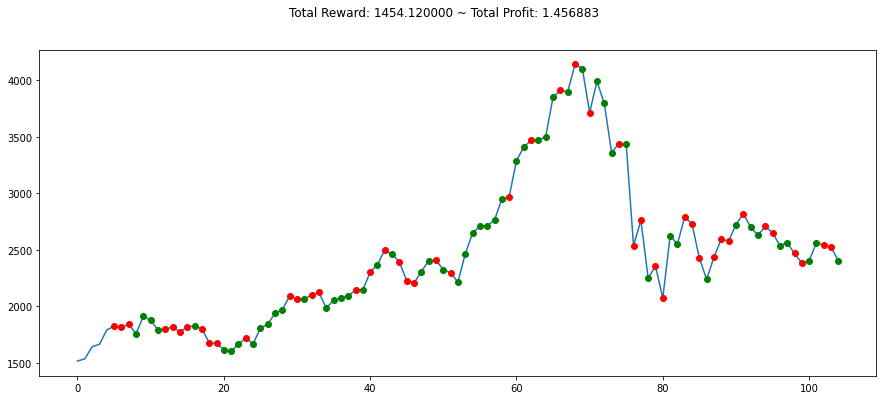

In [136]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()